# INET 4710 Project
## Estimate user post interaction from text and post data

Text Analysis of historical interaction data & content from removed facebook pages.

Author:

## 1. Overview

These days, the activities like users discussion in social network has strong effect for public opinion. Especially, Facebook is more organic and closed than the other social network like twitter due to the system of Facebook. In this project, estimating interaction from a user's comment in 5 Facebook pages related to political topic in the US to think about effective political ads.

The interaction amount I estimate is  (Facebook's "reactions" + "likes" + shares, and comments) for each of the individual posts.


The data is from Facebook's user comment linked to 2016 US election investigation from following facebook pages.

- being_patriotic
- blacktivist
- lgbt_united
- secured_borders
- united_muslims_of_america

Data could download from Project page below.

- Project page: <https://data.world/d1gi/missing-fb-posts-w-share-stats?utm_campaign=dataquest&utm_source=blog&utm_content=180122>

**Download data needs to log in data.world**

Data vizualization example: <https://public.tableau.com/profile/d1gi#!/vizhome/FB4/TotalReachbyPage>

In [1]:
# path config
# I put all the path(data path and pickle object path) here.
from os import path

project_top_path = '/Users/reiven/Documents/Python/CSCI4710/Project'  # this path is Project folder path

# all the folder path(folder path are relative to project_top_path)
data_path = path.join(project_top_path, 'Data')  # Data folder path
binary_path = path.join(project_top_path, 'binary_file')  # binary_file folder path

# all the pickle object path(path are relative to binary_path)
tfidf_vectorizer_path = path.join(binary_path,"tfidf_vectorizer.pkl")
pca_result_path = path.join(binary_path, "pca_result.pkl")
random_forest10_path = path.join(binary_path, "random_forest10_result.pkl")
random_forest100_path = path.join(binary_path, "random_forest100_result.pkl")
random_forest1000_path = path.join(binary_path, "random_forest1000_result.pkl")

All the data have following columns.

- page_url: each dataset's page url. It is same value in each csv.
- source: each dataset's title. Content is same as post_url.
- followers: amount of followers
- date: the: date string when the comment posted.
- time:the: time string when the comment posted.
- time_zone: time_zone string when the comment posted.
- post_type: where the comments were written in. Most of the value are 'Facebook'.
- interactions: the sum of "reactions" + "likes" + shares, and comments for the comment
- post_message: comment string
- post_link: each post's url.

----

## 2. Exploratory Data Analysis

In this section, I show following topics.

- numerical summary of all the data
- data structure of each dataframe
- effective data amount(data which is not null)
- show the oldest, latest and most interacted post data
- word cloud to understand topic
- user post situation plot

In [2]:
# Loading data
from os import path
import pandas as pd


blacktivist_data = pd.read_csv(path.join(data_path, 'blacktivist.csv'))
being_patriotic_data = pd.read_csv(path.join(data_path, 'being_patriotic.csv'))
# heart_of_texas_data = pd.read_csv(path.join(data_path, 'heart_of_texas.csv'))
lgbt_united_data = pd.read_csv(path.join(data_path, 'lgbt_united.csv'))
secured_borders_data = pd.read_csv(path.join(data_path, 'secured_borders.csv'))
united_muslims_of_america_data = pd.read_csv(path.join(data_path, 'united_muslims_of_america.csv'))
summary_stats = pd.read_csv(path.join(data_path, 'fb_removed_list_stats.csv'))


In [3]:
def show_basic_info(data, title):
    """
    Function to show exploratory data analysis 
    that shows following tooic.
    
    - shape(# of rows and columns)
    - data set column names and it's basic summary(not NA, unique, mean and so on)
    :param data: panda's dataframe
    :param title: string
    :return: 
    """
    sep = "\n" + "-" * 10 + "\n"
    print("Data:", title)
    print("Shape(row, column):", data.shape, sep)
    # print("Column name and it's data type")
    # print(data.info(), sep)
    # print("Count of efficient(Not NA) data")
    # print(data.count(), sep)
    print("columns summary")
    print(data.describe(), sep) # remove text data summary
    print("Show first 5 data")
    print(data.head(5))


### 2.1. Short summary of all the data

In [4]:
summary_stats

,source,page_url,page_status,total_shares,interactions,number_of_posts,word_count
0,Blacktivists,Facebook.com/Blacktivists,removed,103767792,6182835,500+,15349.0
1,Heart of Texas,Facebook.com/Txrebels,removed,102950151,3453143,500+,NaN
2,United Muslims of America,Facebook.Com/MuslimAmerica,removed,71355895,2128875,500+,6892.0
3,Being Patriotic,Facebook.Com/Patriototus,removed,51139860,4438745,500+,53782.0
4,Secured Borders,Facebook.Com/Secured.Borders,removed,5600136,1592771,500+,53850.0
5,LGBT United,Facebook.Com/Lgtbun,removed,5187494,1262386,500+,15020.0


The result above shows that the there are 6 resources from facebook page, and all the page is removed. 

The top 2 pages(Blacktivists and Heart of Texas) has huge total shares compared to other topics, 
but the word count(it related to the amount of comment) is not so obviously huge.
I assume people have much interesting to these 2 topics or the pages were created much older than the other pages.

But, heart of texas data does not have actual comment text, so I omit in this project.

### 2.2 Basic statistics and preparation for each page data

In this section, I show each page's data and it's basic summary and format data properly.

First, I clearfy data structure to take Blacktivist data for example, and define what data to format.
After that, seeing each page's summary information and do same data preparation.

#### 2.2.1 Basic statistics about Blactivist page

In [118]:
show_basic_info(blacktivist_data, "Blactivist")

Data: Blactivist
Shape(row, column): (500, 10) 
----------

columns summary
          followers   interactions
count  5.000000e+02     500.000000
mean   2.075356e+05   12365.670000
std    3.478560e+05   27094.789618
min    0.000000e+00    2791.000000
25%    9.218100e+04    4170.250000
50%    1.714990e+05    5826.000000
75%    2.678510e+05    9324.750000
max    6.605641e+06  344309.000000 
----------

Show first 5 data
                    page_url       source  followers        date      time  \
0  Facebook.com/Blacktivists  Blacktivist     107180  2016-07-22  11:00:00   
1  Facebook.com/Blacktivists  Blacktivist     186908  2016-10-26  09:00:35   
2  Facebook.com/Blacktivists  Blacktivist     201136  2016-11-23  10:00:00   
3  Facebook.com/Blacktivists  Blacktivist     347948  2017-06-22  18:00:00   
4  Facebook.com/Blacktivists  Blacktivist     228980  2017-01-17  21:00:00   

  time_zone post_type  interactions  \
0  GMT-0400  Facebook        344309   
1  GMT-0400  Facebook        26

The result above shows that there are 500 columns of data.
Interaction mean is 12365, but it has huge standard deviation.

From the result above, I format all the data with following opearation.

1. removing data row which countain NA value.
2. removing page_url, source and post_link, post_type columns from all the dataset.
3. combine date, time, time_zone to datetime object and omit date, time, and time_zone column.


In [6]:
from datetime import datetime
import pytz as tz


def format_data(df, page_label):
    """
    function to clean dataframes.
    this function drop rows which contains NA, 
    and drop page_url, source, post_link column
    instead of dropping page_url and source, I add page_label text.
    
    also create datetime column and remove date, time, time_zone
    :param df: 
    :param page_label:  
    :return df: 
    """
    past_shape = df.shape
    df = df.dropna(axis=0, how='any')
    df = df.drop(['page_url', 'source', 'post_link', 'post_type'], axis=1)
    df['page_label'] = page_label
    df = df.reset_index()  # reset index for datetime append operation
    
    datetime_list = list()
    for i in range(df.shape[0]):
        # need correct numerical index for code below.
        dt_str = '%s %s %s' % (df['date'][i], df['time'][i], df['time_zone'][i])
        dt_str = dt_str.strip()  # need strip to remove last blank character.
        try:
            dt_parsed = datetime.strptime(dt_str, '%Y-%m-%d %H:%M:%S %Z%z')
            CT = tz.timezone('America/Chicago')
            dt_parsed = dt_parsed.astimezone(CT)
        except ValueError as e:
            print(e)
            print('error happen :%s;' % dt_str)
            dt_parsed = None
        datetime_list.append(dt_parsed)

    df['datetime'] = datetime_list
    df = df.drop(['index', 'date', 'time', 'time_zone'], axis=1)
    df['datetime'] = pd.to_datetime(df['datetime'])

    show = True
    if show:
        print('result shape compare: ', past_shape, df.shape)
    return df


In [119]:

# format all data with format_data()
blacktivist = format_data(blacktivist_data, 'blacktivist')
being_patriotic = format_data(being_patriotic_data, 'being_patriotic')
lgbt_united = format_data(lgbt_united_data, 'lgbt_united')
secured_borders = format_data(secured_borders_data, 'secured_borders')
united_muslims_of_america = format_data(united_muslims_of_america_data, 'united_muslims')


result shape compare:  (500, 10) (498, 5)
result shape compare:  (500, 10) (496, 5)
result shape compare:  (500, 10) (500, 5)
result shape compare:  (500, 10) (500, 5)
result shape compare:  (500, 10) (500, 5)


As the format result, blacktivist and being patriotic data has few missing value.

In [8]:
# show important columns(latest, oldest, most interaction)

def show_important_columns(df):
    """
    show important the oldest, latest, and most interaction data.
    
    :param df: 
    :return: 
    """
    latest_column = df.sort_values('datetime').iloc[-1]
    oldest_column = df.sort_values('datetime').iloc[0]
    highest_interaction_column = df.sort_values('interactions').iloc[-1]
    print("show important columns\n")
    print('# latest data')
    print(latest_column, end='\n\n')
    print('# oldest data')
    print(oldest_column, end='\n\n')
    print('# highest interaction data')
    print(highest_interaction_column, end='\n\n')


In [121]:
# show blacktivist important data with show_important_columns
show_important_columns(blacktivist)

show important columns

# latest data
followers                                           389601
interactions                                          5162
post_message    DON'T PRETEND THAT AGGRESSION HAS NO COLOR
page_label                                     blacktivist
datetime                         2017-08-26 06:00:00-05:00
Name: 295, dtype: object

# oldest data
followers                                                       0
interactions                                                 3524
post_message    ISIS is no worse than the KKK. American societ...
page_label                                            blacktivist
datetime                                2015-11-26 07:18:31-06:00
Name: 437, dtype: object

# highest interaction data
followers                                                  107180
interactions                                               344309
post_message    A 14-year-old Royce Mann brought hundreds of p...
page_label                                    

In [160]:
# define function to show user_post count plot
import matplotlib.pyplot as plt
from datetime import timedelta
from copy import copy
import seaborn as sns

sns.set_style("white")


def show_time_plot(df, title):
    """
    show plot to see the increasing of comment.
    each bar is weekly count of user comment.
    line plot is cumsum count.
    
    :param df: 
    :param title: 
    :return: 
    """
    # TODO: fix plot better
    label_list = []
    week_count_dict = {}
    sort_by_dt = df.sort_values('datetime')
    oldest = sort_by_dt.iloc[0]['datetime']
    latest = sort_by_dt.iloc[-1]['datetime']
    
    delta = timedelta(days=7)
    while oldest < latest:
        label = str(oldest.to_pydatetime()).split(' ')[0]
        label_list.append(label)
        temp = df[(df['datetime'] >= oldest) & (df['datetime'] < (oldest + delta))]
        oldest = oldest + delta
        week_count_dict[label] = temp.shape[0]
    data = list()
    cumsum_data = list()
    for label in label_list:
        data.append(week_count_dict[label])
    for i in range(len(label_list)):
        if i == 0:
            cumsum_data.append(week_count_dict[label_list[i]])
        else:
            cumsum_data.append(cumsum_data[i - 1] + week_count_dict[label_list[i]]) 
    label_list_show = copy(label_list)
    max_index = data.index(max(data))
    for i in range(len(label_list_show)):
        if i not in [0, max_index, len(label_list_show) - 1]:
            label_list_show[i] = ''
    
    
    plt.title('comment amount of %s' % title)
    plt.subplot(2,1,1)
    plt.tick_params(labelbottom="off")
    plt.plot(label_list, cumsum_data,color='green', label='cumsum comment')
    plt.legend()
    plt.subplot(2,1,2)
    plt.bar(label_list, data, width=1.0,color='blue', label='comment per week')
    plt.xticks(label_list, label_list_show)
    plt.xlabel('Date')
    plt.legend()
    plt.show()

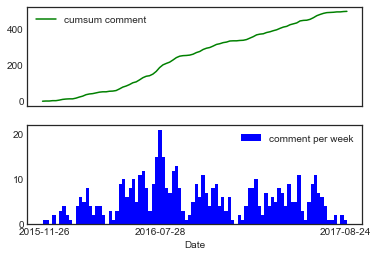

In [161]:

# show blacktivist's user comment situation with show_time_plot()
show_time_plot(blacktivist, 'blacktivist')


The plot above shows the amount of comment per week posted in blacktivist page from 2015/11/26 to 2017/08/24.
I also shows the week when omment was the most frequent. It is 2016/07/28.

I found the date 2016/07/28 were near the Democratic National Convention in 2016 US election.
I assume people were active to discus political topic due to these event related to the election.

In [162]:
# define function to show wordcloud of the post_message
"""
wordcloud is from 
<http://amueller.github.io/word_cloud/index.html>
"""
# wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wc(df):
    text = ','.join(df['post_message'])

    # Generate a word cloud image
    wordcloud = WordCloud(background_color="white", max_words=1000).generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    


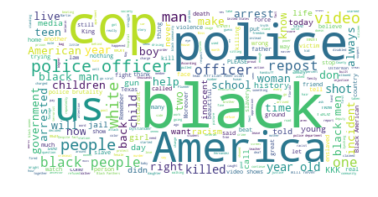

In [163]:
plot_wc(blacktivist)

The word cloud above shows that main keyword in blacktivist page seems "black", "cop", "police", "officer".

I don't know about the political situation in the US so much. 
I heard some news about bad attitude of police officer for black people.
I assume these things are tipical example related to that page. 
That might be the reason why those keywords appears.

#### 2.2.2 Basic statistics about Being patriotic page

In this section, I show statistical summary and some important column(oldest, latest, most shared) and user comment count plot and word cloud plot with formatted being_patriotic data as we describe above. 

I use same functions defined in section 2.2.1.

In [14]:
show_basic_info(being_patriotic, "being patriotic")

Data: being patriotic
Shape(row, column): (496, 5) 
----------

columns summary
           followers   interactions
count     496.000000     496.000000
mean   102779.743952    8955.649194
std     80702.346175   32547.147743
min         0.000000    3927.000000
25%         0.000000    5453.000000
50%    128831.000000    6336.500000
75%    182657.000000    8237.500000
max    219727.000000  724323.000000 
----------

Show first 5 data
   followers  interactions                                       post_message  \
0     145109        724323  At least 50,000 homeless veterans are starving...   
1     205550         78245  The city of New Orleans said that it would rem...   
2          0         39740  A living, breathing page of American history! ...   
3     203212         30506  Nothing can be more treasonous than burning th...   
4     187254         30070  It’s simply unfair that the Government cares m...   

        page_label                  datetime  
0  being_patriotic 2016-09-08 1

The result above shows basic statistics about being patriotic page.
The interaction have huge standard deviation, but the mean value(mean: 8955) is quite smaller than blacktivist page(mean: 12365).

In [15]:
show_important_columns(being_patriotic)

show important columns

# latest data
followers                          219727
interactions                         6684
post_message          Ain't it the truth?
page_label                being_patriotic
datetime        2017-08-15 20:22:00-05:00
Name: 213, dtype: object

# oldest data
followers                                                       0
interactions                                                39740
post_message    A living, breathing page of American history! ...
page_label                                        being_patriotic
datetime                                2015-08-08 12:15:26-05:00
Name: 2, dtype: object

# highest interaction data
followers                                                  145109
interactions                                               724323
post_message    At least 50,000 homeless veterans are starving...
page_label                                        being_patriotic
datetime                                2016-09-08 14:30:00-05:00
N

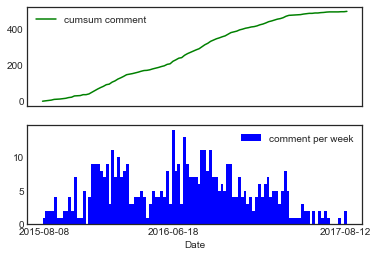

In [164]:
show_time_plot(being_patriotic, 'being patriotic')

The plot above shows the amount of comment per week posted in being patriotic page from 2015/08/08 to 2017/08/12.
I also shows the week when comment was the most frequent. It is 2016/06/18.

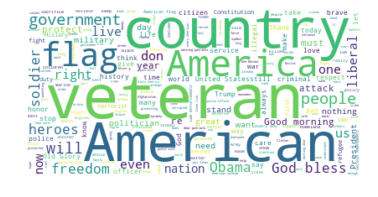

In [165]:
plot_wc(being_patriotic)

The word cloud above shows that main keyword in being patriotic page seems "country", "Veteran", "american", "flag".

The topic in being patriotic page might be about US army. So, the result of word cloud also reflect it.

#### 2.2.3 Basic statistics about LGBT united page

In this section, I show basic information about lgbt_united page data samely above.


In [131]:
show_basic_info(lgbt_united, "lgbt united")

Data: lgbt united
Shape(row, column): (500, 5) 
----------

columns summary
           followers  interactions
count     500.000000    500.000000
mean    10374.988000   2524.772000
std     36750.688255   4958.490841
min         0.000000    921.000000
25%         0.000000   1458.000000
50%         0.000000   1752.500000
75%         0.000000   2239.500000
max    142874.000000  82298.000000 
----------

Show first 5 data
   followers  interactions                                       post_message  \
0          0         82298  It really doesn't matter! You know who you are...   
1          0         61819  All of the horrified faces in the background...😄👍   
2          0         33447  This is why it's important to think before you...   
3          0         15686                I'm totally saying this next time!😂   
4          0         14400  This is why it's important to think before you...   

    page_label                  datetime  
0  lgbt_united 2015-10-30 15:20:00-05:00  
1  lg

The result above shows basic statistics about lgbt united page.
The interaction have not so huge standard deviation compared to the other pages.
Also, intereaction mean is quite smaller than the other pages.

Also, follower data might be wrong or missing.

In [132]:
show_important_columns(lgbt_united)

show important columns

# latest data
followers                                                  142874
interactions                                                 1178
post_message    Fun double standard. Hm, scratch that. It's no...
page_label                                            lgbt_united
datetime                                2017-08-24 15:59:47-05:00
Name: 473, dtype: object

# oldest data
followers                                                       0
interactions                                                 1162
post_message    #queerquote #NeilPatrickHarris #family #LGBTyo...
page_label                                            lgbt_united
datetime                                2015-07-12 18:35:01-05:00
Name: 476, dtype: object

# highest interaction data
followers                                                       0
interactions                                                82298
post_message    It really doesn't matter! You know who you are...
page_label 

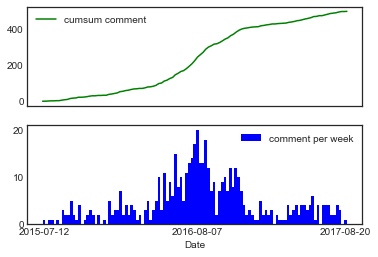

In [166]:
show_time_plot(lgbt_united, 'lgbt united')

The plot above shows the amount of comment per week posted in lgbt united page from 2015/07/12 to 2017/08/20.
I also shows the week when comment was the most frequent. It is 2016/08/07.

The plot seems the discussion became more active near the 2016/08/07 than the other topic.

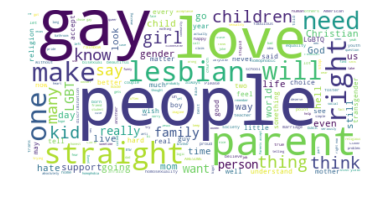

In [134]:
plot_wc(lgbt_united)

The word cloud above shows that main keyword in being lgbt united page seems "gay", "lesbian", "love", "straight".

#### 2.2.4 Basic statistics about Secured Borders page

In [14]:
show_basic_info(secured_borders, "secured borders")

Data: secured borders
Shape(row, column): (500, 5) 
----------

columns summary
           followers  interactions
count     500.000000     500.00000
mean    11200.272000    3185.54200
std     45480.374095    5027.32195
min         0.000000    1103.00000
25%         0.000000    1779.75000
50%         0.000000    2464.00000
75%         0.000000    3524.25000
max    546007.000000  100707.00000 
----------

Show first 5 data
   followers  interactions                                       post_message  \
0          0        100707  As I've said before, I'm really concerned if v...   
1          0         43668  Mexican-American whose parents came into Ameri...   
2          0         16087  Our government spends billions of dollars on i...   
3     389504         15425                     (Prepare to Take America Back)   
4     546007         11876                     (Judge Jeanine Pirro has Fans)   

        page_label                  datetime  
0  secured_borders 2016-10-07 20:00:00-0

In [136]:
show_important_columns(secured_borders)

show important columns

# latest data
followers                                                  135784
interactions                                                 2320
post_message     It’s utterly despicable that mosques were all...
page_label                                        secured_borders
datetime                                2017-08-20 13:00:00-05:00
Name: 274, dtype: object

# oldest data
followers                                                       0
interactions                                                 3319
post_message    What a disgrace! Our liberal government is for...
page_label                                        secured_borders
datetime                                2016-09-12 09:01:12-05:00
Name: 142, dtype: object

# highest interaction data
followers                                                       0
interactions                                               100707
post_message    As I've said before, I'm really concerned if v...
page_label 

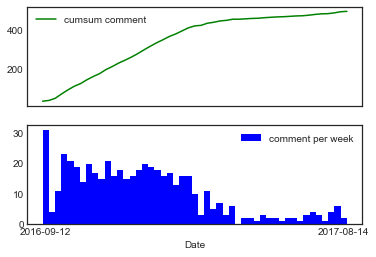

In [167]:
show_time_plot(secured_borders, 'secured borders')

The plot above shows the amount of comment posted in secured border.
The week when the comment was most freaquent is 2016/09/12. 
I assume people in the US really interested about this topic compared to the other topics and they continuously discuss before the election.

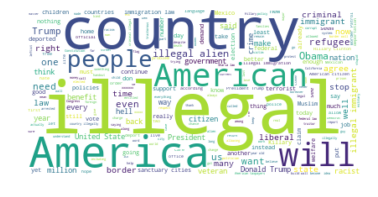

In [138]:
plot_wc(secured_borders)

The wordcloud above shows the keyword in sequred border are "country", "illegal".

#### 2.2.5 Basic statistics about United Muslims of America page

In [139]:
show_basic_info(united_muslims_of_america, "united muslims of america")

Data: united muslims of america
Shape(row, column): (500, 5) 
----------

columns summary
           followers   interactions
count     500.000000     500.000000
mean   142711.790000    4257.750000
std    136249.685866   10378.618766
min         0.000000    1303.000000
25%         0.000000    2215.000000
50%    207571.000000    2672.000000
75%    268736.000000    3499.500000
max    329520.000000  150246.000000 
----------

Show first 5 data
   followers  interactions                                       post_message  \
0          0        150246  New York city Muslim Harassment Social Experim...   
1          0        133501  I think God has ordered all mankind with modes...   
2          0         80066  What Halal meat or Halal food means? you shoul...   
3          0         79918  Because the media wants you to know ONLY when ...   
4          0         35275  Share if you believe Muslims have nothing to d...   

       page_label                  datetime  
0  united_muslims 2016

In [140]:
show_important_columns(united_muslims_of_america)

show important columns

# latest data
followers                                                  329520
interactions                                                 2797
post_message    If a woman is free to show her body, why shoul...
page_label                                         united_muslims
datetime                                2017-08-23 11:54:00-05:00
Name: 224, dtype: object

# oldest data
followers                                                       0
interactions                                                 4351
post_message    Hillary Clinton Slams Donald Trump’s Anti-Musl...
page_label                                         united_muslims
datetime                                2016-01-26 09:14:23-06:00
Name: 76, dtype: object

# highest interaction data
followers                                                       0
interactions                                               150246
post_message    New York city Muslim Harassment Social Experim...
page_label  

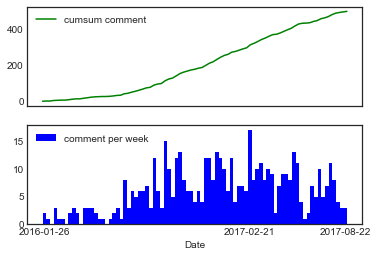

In [169]:
show_time_plot(united_muslims_of_america, 'united muslims of america')

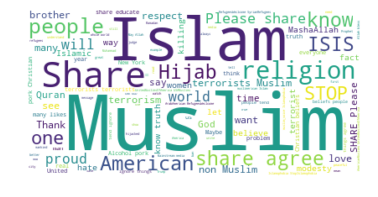

In [31]:
plot_wc(united_muslims_of_america)

#### 2.2.6 All data

In this section, conbining all data and show some information like oldest, latest, and most shared user comment, user comment amount plot, wordcloud.

Data: all data
Shape(row, column): (2494, 5) 
----------

columns summary
          followers   interactions
count  2.494000e+03    2494.000000
mean   9.397965e+04    6253.224138
std    1.844759e+05   20080.782539
min    0.000000e+00     921.000000
25%    0.000000e+00    2094.250000
50%    0.000000e+00    3433.000000
75%    1.844242e+05    5865.500000
max    6.605641e+06  724323.000000 
----------

Show first 5 data
   followers  interactions                                       post_message  \
0     107180        344309  A 14-year-old Royce Mann brought hundreds of p...   
1     186908        269853                       Africa is in your bloodline.   
2     201136        245516  PLEASE HELP THIS VIDEO GO VIRAL. THESE COPS CA...   
3     347948        138590                                       [no content]   
4     228980        130298                          repost @africanstylediary   

    page_label                  datetime  
0  blacktivist 2016-07-22 10:00:00-05:00  
1  blac

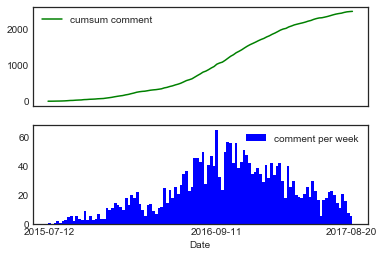

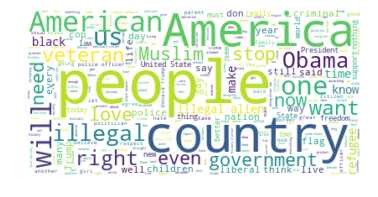

In [171]:
all_data = pd.concat([blacktivist, being_patriotic, lgbt_united, secured_borders, united_muslims_of_america])
all_data.reset_index()  # reset index
# print(all_data.shape)
show_basic_info(all_data, 'all data')
show_important_columns(all_data)
show_time_plot(all_data, 'all data')
plot_wc(all_data)


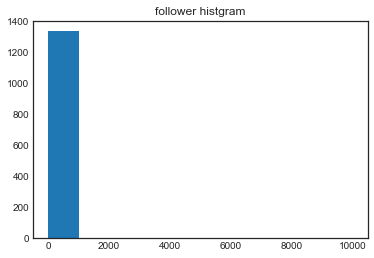

In [172]:
follower_data = all_data['followers']
plt.title('follower histgram')
plt.hist(follower_data, range=(0, 10000))
plt.show()

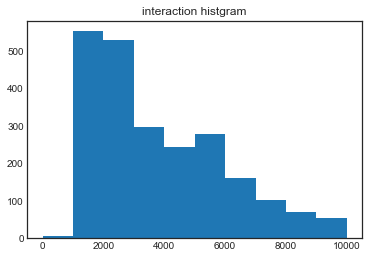

In [25]:
interaction_data = all_data['interactions']
plt.title('interaction histgram')
plt.hist(interaction_data, range=(0, 10000))
plt.show()

----

## 3. Data formatting

I use all_data's user_comment as predictor variables to explain interaction amount in my project.

In this section, I first split user_comment and interactions data into train and test dataset.
And format post_message text data to generate tfidf matrix, then using PCA to decompose data into lower dimension.

In [174]:
from sklearn.model_selection import train_test_split

X = all_data['post_message']
y = all_data['interactions'].as_matrix()

# use 20% of data as test dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [176]:
# save object to pickle blob file.
import pickle
from os.path import exists


def save_object(path, fit):
    """
    function to save object to pickle file
    use fit() to create object, and return object anyway.
    
    :param path: 
    :param fit: 
    :return: 
    """
    if exists(path):
        with open(path, 'rb') as f:
            return pickle.load(f)
    else:
        obj = fit()
        with open(path, 'wb') as f:
            pickle.dump(obj, f)
            f.close()
        return obj

In [178]:
# make term document matrix
from sklearn.feature_extraction.text import TfidfVectorizer


def tfidf_vec_run():
    vectorizer = TfidfVectorizer(
        use_idf=True,
        analyzer='word',
        stop_words='english',
        lowercase=True
    )
    vectorizer.fit(X_train)
    return vectorizer

# vectorizer only trained with train post_message.
vectorizer = save_object(tfidf_vectorizer_path, tfidf_vec_run)  # path defined in top of the notebook

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)
X_train = X_train.toarray()
X_test = X_test.toarray()
print("train tfidf data shape: ", X_train.shape)
print("test tfidf data shape: ", X_test.shape)

train tfidf data shape:  (1995, 8712)
test tfidf data shape:  (499, 8712)


#### 3.1. showing PCA decomposition

In this section, doing PCA and find first n principle components that explain more than 90% of the data.

In [180]:
# PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

n_component_list = [x*100 for x in range(int(3000/100))]
print("original component size: ",X_train.shape[1])

def pca_run():
    """
    function that save the result of explained variance ratio of first n principle components.
    explained variance ratio is the ratio how much the first n principle components explains the original data(train tfidf)
    I calculates every 100 principle components from 0 to 3000.
    
    It takes long time because it calculate pca 30 times.
    :return: 
    """
    n_component_explanation_rate_list = list()
    for n_component in n_component_list:
        pca = PCA(n_components=n_component)
        # pca = KernelPCA(n_components=2,  kernel='rbf', gamma=1.0)
        pca.fit_transform(X_train)
        n_component_explanation_rate_list.append(sum(pca.explained_variance_ratio_))
    return n_component_explanation_rate_list

n_component_explanation_rate_list = save_object(pca_result_path, pca_run)  # path defined in top of the notebook

print('PCA explanation rate')
print('component:\t cumsum explanation rate')
for n_component, rate in zip(n_component_list, n_component_explanation_rate_list):
    print("%d:\t %0.3f" % (n_component, rate))


original component size:  8712
PCA explanation rate
component:	 cumsum explanation rate
0:	 0.000
100:	 0.290
200:	 0.423
300:	 0.520
400:	 0.597
500:	 0.661
600:	 0.716
700:	 0.763
800:	 0.806
900:	 0.843
1000:	 0.876
1100:	 0.906
1200:	 0.931
1300:	 0.952
1400:	 0.969
1500:	 0.983
1600:	 0.994
1700:	 0.999
1800:	 1.000
1900:	 1.000
2000:	 1.000
2100:	 1.000
2200:	 1.000
2300:	 1.000
2400:	 1.000
2500:	 1.000
2600:	 1.000
2700:	 1.000
2800:	 1.000
2900:	 1.000


As the result shows first 800 principle components explains more than 80% of original data.
Also, first 1100 principle components explains more than 90% of original data.

Originally, train tfidf has 8712 components. It is quite too huge and have a lot of meaningless items.
Using pca to decompose lower dimension might be better to omit meaningless value's effects and better for computing.

In [101]:
# use first 800 components(explain more than 80% of original train tfidf matrix)
# use first 1100 components(explain more than 90% of original train tfidf matrix)

pca80 = PCA(n_components=800)
pca90 = PCA(n_components=1100)
pca80.fit(X_train)
pca90.fit(X_train)

tfidf80 = pca80.transform(X_train)
tfidf90 = pca90.transform(X_train)
tfidf80_test = pca80.transform(X_test)
tfidf90_test = pca90.transform(X_test)

(499, 800)


----

### 4.1. Linear regression

In this section, I try linear regression to think that using regression schema to assume interaction from user comment data is meaningful or not.

In [102]:
from sklearn.linear_model import LinearRegression

# original tfidf matrix 
ln = LinearRegression()
ln.fit(X_train, y_train)

# compressed tfidf matrix using pca80
ln80 = LinearRegression()
ln80.fit(tfidf80, y_train)

# compressed tfidf matrix using pca90
ln90 = LinearRegression()
ln90.fit(tfidf90, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [103]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# ln.score calculates R^2 score


def show_result(model, train_X, test_X, train_y, test_y, title):
    pred_y = model.predict(test_X)
    pred_train_y = model.predict(train_X)
    print('Calculate with %s data' % title)
    print('train R^2 score', r2_score(train_y, pred_train_y))
    print('test mean squared score', mean_squared_error(test_y, pred_y), end='\n\n')


show_result(ln, X_train, X_test, y_train, y_test, 'fitting with original train tfidf matrix')
show_result(ln80, tfidf80, tfidf80_test, y_train, y_test, 'fitting with compressed tfidf with first 800 pc')
show_result(ln90, tfidf90, tfidf90_test, y_train, y_test, 'fitting with compressed tfidf with first 1100 pc')

(1995, 8712)
(499, 8712)
Calculate with fitting with original train tfidf matrix data
train R^2 score 0.59399681458
test mean squared score 8.61984000925e+34

(1995, 800)
(499, 800)
Calculate with fitting with compressed tfidf with first 800 pc data
train R^2 score 0.409537542169
test mean squared score 250987399.28

(1995, 1100)
(499, 1100)
Calculate with fitting with compressed tfidf with first 1100 pc data
train R^2 score 0.505931324135
test mean squared score 271323830.197



I assume the result above shows somewhat relation between comment data and amount of interaction due to train R\^2 score.
But, some meaningless weight might decay the prediction, and that causes bad test R\^2 score.

So, I try standarization from next task with Lasso.

I also compare 2 train data, one is post_message text's tfidf matrix, the other is tfidf and follower amount and timestamp data.

The reason I add those 2 additional columns are due to following 2 assumption.

- More followers leads to more interaction
- Older post have more time to get interaction

The result supports using follower amount and timestamp leads better prediction.

After that, I use 2 decomposed version and do samething. 
From the result, I use decompose with first 900 principle component(explain more than 90%) with follower amount and timestamp data from the experiment below.



### 4.2. Lasso regression

In this section, I try lasso regression to omit meaningless parameter's effect.

In [104]:
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore')

for alpha in [0.02, 0.5, 1, 5, 10, 100]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(tfidf90, y_train)
    show_result(lasso, tfidf90, tfidf90_test, y_train, y_test, 'alpha=%0.3f' % alpha)

(1995, 1100)
(499, 1100)
Calculate with alpha=0.020 data
train R^2 score 0.505929437196
test mean squared score 271114309.083

(1995, 1100)
(499, 1100)
Calculate with alpha=0.500 data
train R^2 score 0.504786660305
test mean squared score 266356456.287

(1995, 1100)
(499, 1100)
Calculate with alpha=1.000 data
train R^2 score 0.50151863785
test mean squared score 261866746.826

(1995, 1100)
(499, 1100)
Calculate with alpha=5.000 data
train R^2 score 0.425430710102
test mean squared score 235784471.645



(1995, 1100)
(499, 1100)
Calculate with alpha=10.000 data
train R^2 score 0.298764724807
test mean squared score 220597688.765

(1995, 1100)
(499, 1100)
Calculate with alpha=100.000 data
train R^2 score 0.00391932700248
test mean squared score 209345408.508



As the result above shows, increasing alpha parameter decreases both train and test criteria.
But, higher alphas like 100 is too much to protect overfitting.

I think alpha=0.5 or 1 seems better both train and test criteria decreasing and prevent overfitting.

From now, I assume the data has somewhat nonlinear relationship.
So, I try neural network.

### 4.3. Neural Network

In this section, I try neural network model.

In [105]:
from sklearn.neural_network import MLPRegressor

# maybe change Keras.
model = MLPRegressor(
    activation='relu',
    hidden_layer_sizes=(100, 100, 100, 100),
    random_state=1
)
model.fit(tfidf90, y_train)
show_result(model, tfidf90, tfidf90_test, y_train, y_test, '')


(1995, 1100)
(499, 1100)
Calculate with  data
train R^2 score 0.682710757364
test mean squared score 263179886.856



In [106]:
from sklearn.ensemble import RandomForestRegressor

model_list = list()


def rf10_run():
    model = RandomForestRegressor(n_estimators=10, max_features='log2', random_state=1)
    model.fit(tfidf90, y_train)
    return model

model = save_object(random_forest10_path, rf10_run)
model_list.append(model)


def rf100_run():
    model = RandomForestRegressor(n_estimators=100, max_features='log2', random_state=1)
    model.fit(tfidf90, y_train)
    return model

model = save_object(random_forest100_path, rf100_run)
model_list.append(model)


def rf1000_run():
    model = RandomForestRegressor(n_estimators=1000, max_features='log2', random_state=1)
    model.fit(tfidf90, y_train)
    return model

model = save_object(random_forest1000_path, rf1000_run)
model_list.append(model)

for model in model_list:
    show_result(model, tfidf90, tfidf90_test, y_train, y_test, '')


(1995, 1100)
(499, 1100)
Calculate with  data
train R^2 score 0.60428672366
test mean squared score 248626823.681

(1995, 1100)
(499, 1100)
Calculate with  data
train R^2 score 0.643932169104
test mean squared score 224647727.08

(1995, 1100)
(499, 1100)


Calculate with  data
train R^2 score 0.65036158374
test mean squared score 223011022.967



## 4. Model Evaluation


In [117]:
from collections import OrderedDict
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold

models = OrderedDict()
models['linear_regression'] = LinearRegression()
models['lasso'] = lasso = Lasso(alpha=0.5)
models['neural_network'] = MLPRegressor(
    activation='relu',
    hidden_layer_sizes=(100, 100, 100, 100),
    random_state=1
)
models['random_forest'] = RandomForestRegressor(n_estimators=1000, max_features='log2', random_state=1)

scorer = make_scorer(mean_squared_error)
model_result = OrderedDict()

kf = KFold(n_splits=3, random_state=1)


data_matrix = all_data.as_matrix(['post_message', 'interactions'])
X = data_matrix[:,0]
y = data_matrix[:,1]

for key in models:
    kf_test_mse_list = list()
    for train, test in kf.split(X):
        X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
        vectorizer = TfidfVectorizer(
            use_idf=True,
            analyzer='word',
            stop_words='english',
            lowercase=True
        )
        vectorizer.fit(X_train)
        X_train = vectorizer.transform(X_train)
        X_test = vectorizer.transform(X_test)
        X_train = X_train.toarray()
        X_test = X_test.toarray()
        pca90 = PCA(n_components=1100)
        pca90.fit(X_train)
        X_train = pca90.transform(X_train)
        X_test = pca90.transform(X_test)
        
        models[key].fit(X_train, y_train)
        y_test_pred = models[key].predict(X_test)
        kf_test_mse_list.append(mean_squared_error(y_test, y_test_pred))
    mean_score = np.mean(kf_test_mse_list)
    model_result[key] = mean_score

print("model's mean_squared_error")
print("model: score")
for key in model_result:
    print("%s:\t %s" % (key, model_result[key]))


Index(['followers', 'interactions', 'post_message', 'page_label', 'datetime'], dtype='object')


model's mean_squared_error
model: score
linear_regression:	 472107211.923
lasso:	 467506478.554
neural_network:	 450397550.302
random_forest:	 415890788.308
